<a href="https://colab.research.google.com/github/Afreed08/ML-major/blob/main/MAJORPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("/content/signal-data.csv")
print(df.info())
print(df.head())


missing_values = df.isnull().sum()
print("Columns with missing values:", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0

In [ ]:

df.drop(columns=["Time"], inplace=True)

#dropping columns with >90% missing values
threshold = 0.9 * len(df)
cols_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]
df.drop(columns=cols_to_drop, inplace=True)

#filling remaining missing values with median
df.fillna(df.median(), inplace=True)

In [ ]:
#correlation matrix
corr_matrix = df.corr().abs()

#highly correlated features >0.95
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]

#dropping highly correlated features
df.drop(columns=high_corr_features, inplace=True)


print("New dataset shape:", df.shape)

New dataset shape: (1567, 401)



Univariate Analysis:

Descriptive statistics of the dataset:
                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.116476     0.121825     1.462860    -0.000842  ...   
std       0.0     6.209385     0.008936     0.073

<ipython-input-13-3ad37ee38282>:13: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


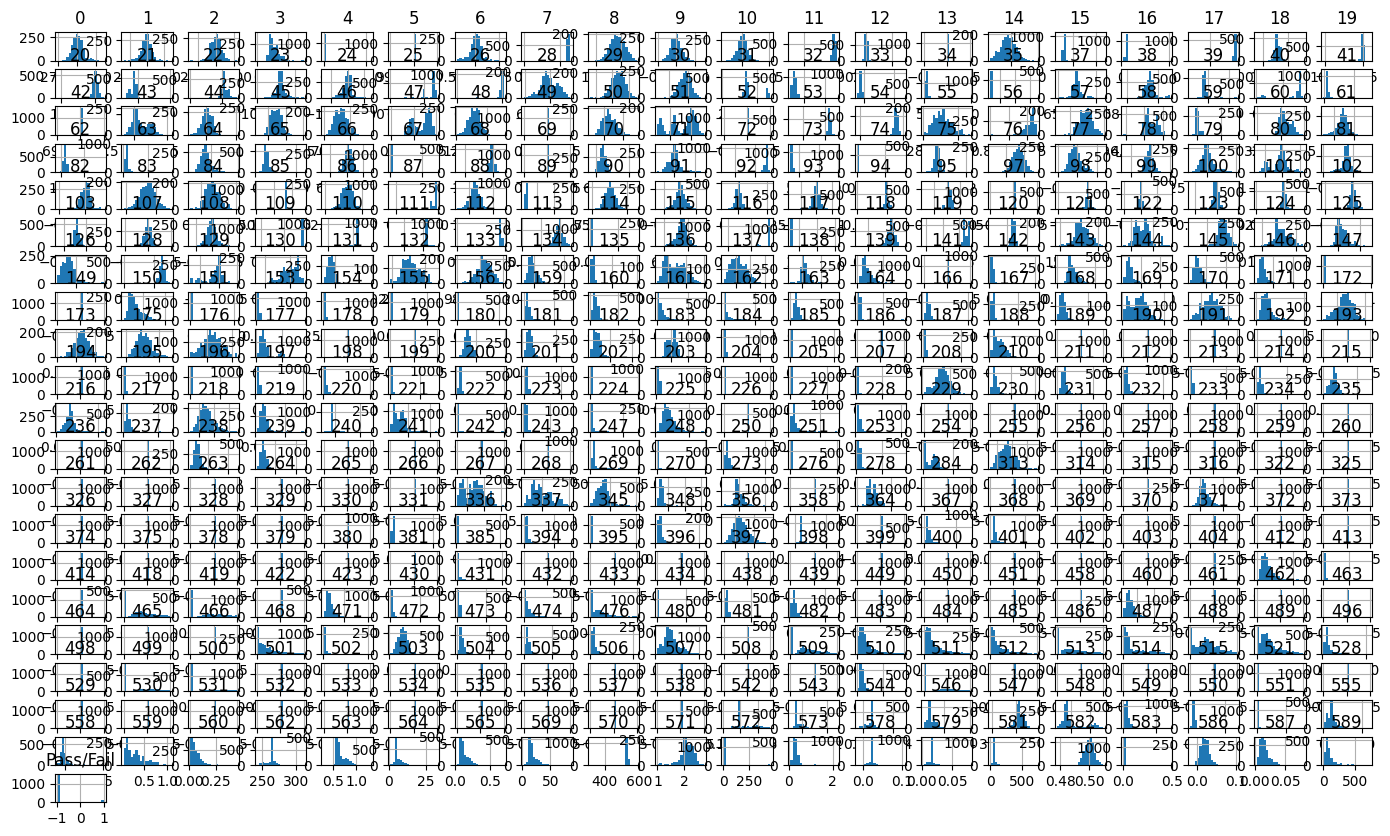

In [ ]:



# Assuming 'df' is your DataFrame

# Univariate Analysis
print("\nUnivariate Analysis:")

# Descriptive statistics for numerical features
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Histograms for numerical features
print("\nPlotting histograms for numerical features:")
df.hist(figsize=(17, 10), bins=20)
plt.tight_layout()
plt.show()


Plotting boxplots for outlier detection:


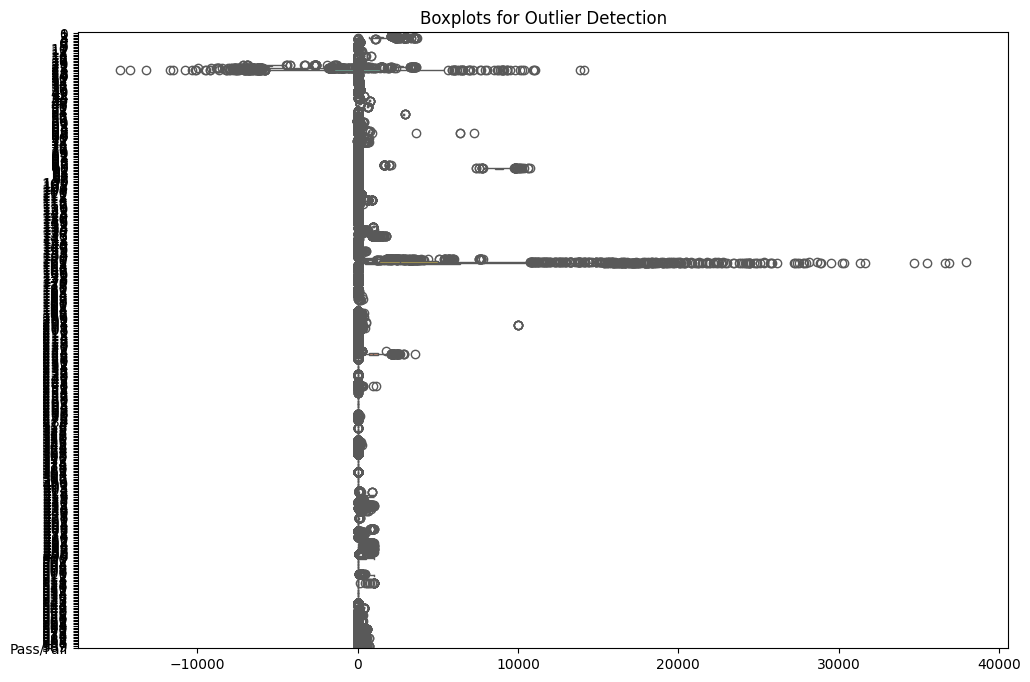


Class distribution of target variable (Pass/Fail):


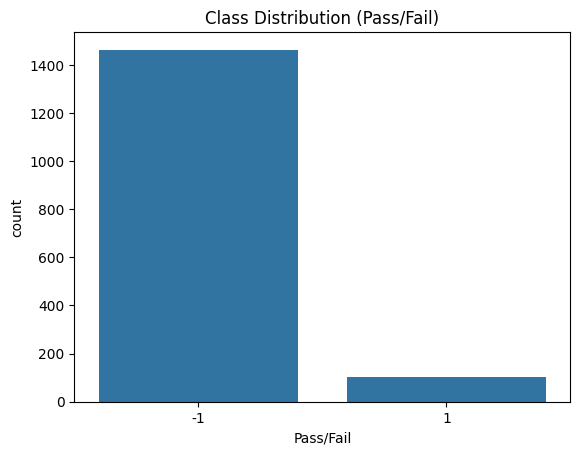

In [ ]:
# Boxplots for outlier detection
print("\nPlotting boxplots for outlier detection:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplots for Outlier Detection')
plt.show()

# Plot class distribution for the target variable
print("\nClass distribution of target variable (Pass/Fail):")
sns.countplot(x='Pass/Fail', data=df)
plt.title('Class Distribution (Pass/Fail)')
plt.show()


Bivariate Analysis:

Correlation Matrix:


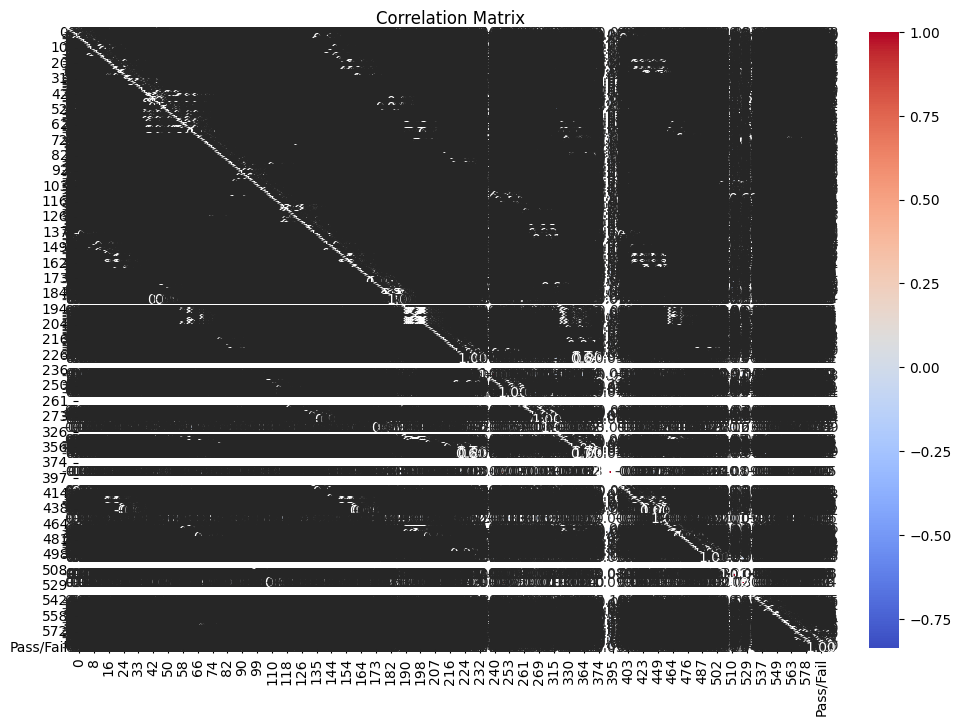

In [ ]:

# Bivariate Analysis (Relationship between Features)
print("\nBivariate Analysis:")

# Correlation matrix to examine relationships between numerical features
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#separatation
X = df.drop(columns=["Pass/Fail"])
y = df["Pass/Fail"]

#class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#splitting
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9914675767918089
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9931740614334471
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.7252559726962458
              precision    recall  f1-score   support

          -1       0.96      0.49      0.65       306
           1       0.64      0.98      0.77       280

    accuracy                           0.73       586
   macro avg       0.80      0.74      0.71       586
weighted avg       0.81      0.73      0.71       586



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Random Forest Accuracy: 0.9863481228668942
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       306
           1       0.98      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf, "best_rf_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
#Conclusion
#*Feature selection removed unnecessary signals and improved model efficiency.
#*SMOTE handled class imbalance effectively.
#*Random Forest performed best after hyperparameter tuning.
#*The trained model can now predict semiconductor yield failures.